In [11]:
import pandas as  pd
dataset = pd.read_csv(r"Job_Placement_Data.csv")

print(dataset)

    gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0        M           67.00    Others           91.00    Others    Commerce   
1        M           79.33   Central           78.33    Others     Science   
2        M           65.00   Central           68.00   Central        Arts   
3        M           56.00   Central           52.00   Central     Science   
4        M           85.80   Central           73.60   Central    Commerce   
..     ...             ...       ...             ...       ...         ...   
210      M           80.60    Others           82.00    Others    Commerce   
211      M           58.00    Others           60.00    Others     Science   
212      M           67.00    Others           67.00    Others    Commerce   
213      F           74.00    Others           66.00    Others    Commerce   
214      M           62.00   Central           58.00    Others     Science   

     degree_percentage undergrad_degree work_experience  emp_te

In [12]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB
None


In [13]:
xSample = dataset.iloc[:,1:12]
ySample = dataset.status

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ySample = le.fit_transform(ySample)
ySampleName = le.classes_#!!!!  #category name

print(ySample)
print(ySampleName)

[1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0]
['Not Placed' 'Placed']


In [16]:
list = ["ssc_board","hsc_board","hsc_subject","undergrad_degree","work_experience","specialisation"]

for li in list:
    xSample[li] = le.fit_transform(xSample[li])

    print(xSample)

     ssc_percentage  ssc_board  hsc_percentage  hsc_board  hsc_subject  \
0             67.00          1           91.00          1            1   
1             79.33          0           78.33          1            2   
2             65.00          0           68.00          0            0   
3             56.00          0           52.00          0            2   
4             85.80          0           73.60          0            1   
..              ...        ...             ...        ...          ...   
210           80.60          1           82.00          1            1   
211           58.00          1           60.00          1            2   
212           67.00          1           67.00          1            1   
213           74.00          1           66.00          1            1   
214           62.00          0           58.00          1            2   

     degree_percentage  undergrad_degree  work_experience  \
0                58.00                 2          

In [62]:
print(xSample.corr()) #correlation

                     ssc_percentage  ssc_board  hsc_percentage  hsc_board  \
ssc_percentage             1.000000   0.116194        0.511472   0.066996   
ssc_board                  0.116194   1.000000       -0.137013   0.605883   
hsc_percentage             0.511472  -0.137013        1.000000  -0.019548   
hsc_board                  0.066996   0.605883       -0.019548   1.000000   
hsc_subject                0.236364   0.050919       -0.164091   0.152227   
degree_percentage          0.538404   0.038070        0.434206   0.067229   
undergrad_degree           0.205896   0.100863       -0.086450   0.057960   
work_experience            0.175675  -0.040744        0.141025   0.038357   
emp_test_percentage        0.261993  -0.018991        0.245113   0.039108   
specialisation            -0.172536  -0.051565       -0.241630   0.002232   
mba_percent                0.388478   0.083120        0.354823   0.090201   

                     hsc_subject  degree_percentage  undergrad_degree  \
ss

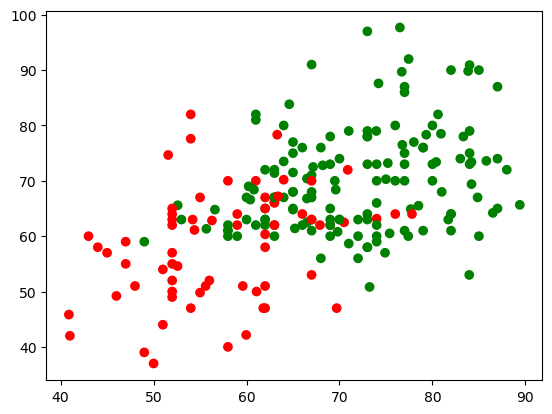

In [63]:
import matplotlib.pyplot as plt

x = xSample.iloc[:,0]
y = pd.Series(ySample)

x1 = xSample.iloc[:,2]
colors ={0:"red",1:"green"}
plt.scatter(x, x1, c= y.map(colors))
plt.show()


In [64]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xSample,ySample,test_size=0.2,random_state=42) 

print(f"""
    xTrain: {xTrain.shape},
    xTest: {xTest.shape}, 
    
    yTrain: {yTrain.shape},
    yTest: {yTest.shape}
    """)


    xTrain: (172, 11),
    xTest: (43, 11), 
    
    yTrain: (172,),
    yTest: (43,)
    


In [73]:
from sklearn. neighbors import KNeighborsClassifier as NGC
from sklearn.metrics import classification_report, confusion_matrix

classifier_model = NGC(n_neighbors=5,metric="minkowski", p=1) #hiperparametre optimizasyonları düzenlenebilir!
classifier_model.fit(xTrain,yTrain)

y_test_prediction = classifier_model.predict(xTest)

In [75]:
#Desicion Tree ALgorithm

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini", splitter="best",random_state=42)  #gini, entropi, 3rd?
model.fit(xTrain,yTrain)
y_test_prediction = model.predict(xTest)

              precision    recall  f1-score   support

  Not Placed       0.69      0.75      0.72        12
      Placed       0.90      0.87      0.89        31

    accuracy                           0.84        43
   macro avg       0.80      0.81      0.80        43
weighted avg       0.84      0.84      0.84        43



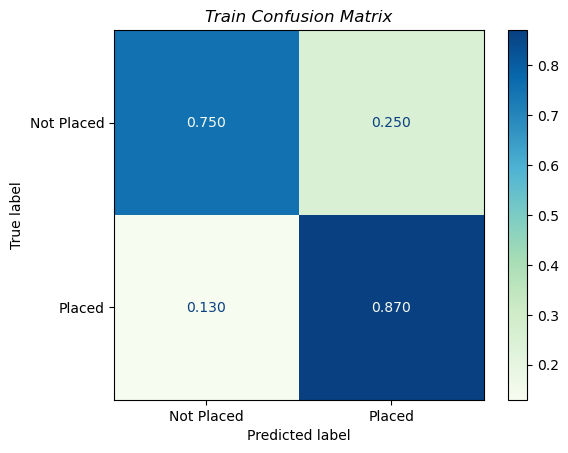

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(classification_report(yTest,y_test_prediction, target_names=["Not Placed","Placed"]))
cm = confusion_matrix(yTest, y_test_prediction,normalize="true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Placed","Placed"])
disp = disp.plot(cmap = plt.cm.GnBu, values_format='.3f')
plt.title(f"Train Confusion Matrix", style="italic")
plt.show()